<h3>Logistic Regression - Respondent 1 & 3 </h3>

<h2>Pre-processing</h2>

         Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
3705  0.125566  0.136948  0.021518  0.116770  0.041248  0.112264  0.059114   
3706  0.125566  0.137617  0.021531  0.132963  0.040812  0.112249  0.067522   
3707  0.125566  0.137096  0.021582  0.169795  0.040925  0.111568  0.087434   
3708  0.125566  0.136868  0.021714  0.218535  0.041063  0.111219  0.114075   
3709  0.125566  0.137239  0.021806  0.256706  0.040785  0.110944  0.135015   

      Engagement  Valence  Sentimentality  Confusion Cognitive Task Screens  
3705    0.328766      0.0        0.976782   0.036977        Explore     Map  
3706    0.328766      0.0        0.911952   0.034095        Explore     Map  
3707    0.328766      0.0        0.831274   0.026797        Explore     Map  
3708    0.328766      0.0        0.829263   0.019318        Explore     Map  
3709    0.328766      0.0        0.773583   0.014509        Explore     Map  
148759


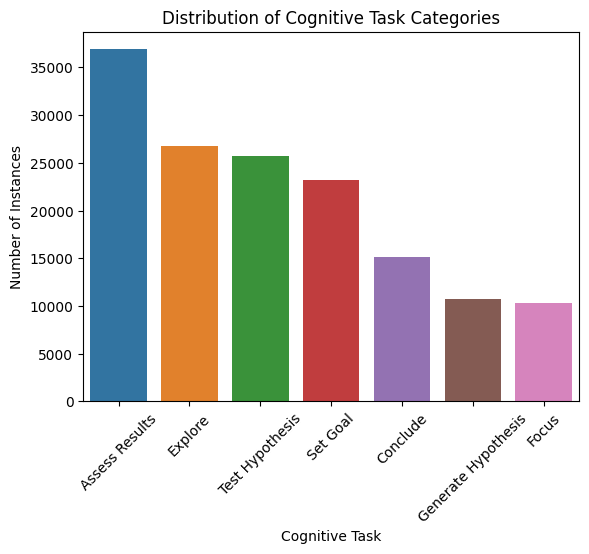

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv'
data = pd.read_csv(file_path)

# Load the second CSV file
new_file_path = '003-91dc3428_emotions_with_cognitive_tesk_and_screen.csv'
new_data = pd.read_csv(new_file_path)

# Merge the two dataframes
data = pd.concat([data, new_data])

# Drop the Timestamp column
data = data.drop('Timestamp', axis=1)

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
print(data.head())
print(data.shape[0])

# Count unique values
category_counts = data['Cognitive Task'].value_counts()

# Plot the Cognitive Task values distribution
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Cognitive Task')
plt.ylabel('Number of Instances')
plt.title('Distribution of Cognitive Task Categories')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


# Select only relevant columns
selected_features = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Surprise', 'Confusion', 'Cognitive Task', 'Screens']
data = data[selected_features]

# Define the categories from the 'screens' column you want to include as features
selected_screens = ['Filter', 'Supporting material', 'Map', 'Statistics']

# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Screens']

# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(categories=[selected_screens], handle_unknown='ignore', sparse_output=False))])

# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features) + selected_screens

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


<h2>Logistic Regression Model</h2>

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the LogisticRegression class
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Test the model
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[6421    1  611    0    4   45  406]
 [1185   10 1485    0    1   22  354]
 [1395    0 3249    0    4   23  639]
 [  44    0  196    9    0    0 1802]
 [ 971    2  853    0    7   80  204]
 [3159   17 1264    0   16  126    0]
 [ 124    0    2    6    0    0 5015]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       0.48      0.86      0.62      7488
           Conclude       0.33      0.00      0.01      3057
            Explore       0.42      0.61      0.50      5310
              Focus       0.60      0.00      0.01      2051
Generate Hypothesis       0.22      0.00      0.01      2117
           Set Goal       0.43      0.03      0.05      4582
    Test Hypothesis       0.60      0.97      0.74      5147

           accuracy                           0.50     29752
          macro avg       0.44      0.35      0.28     29752
       weighted avg       0.46      0.50      0.38     29752


Accuracy Score

<h3>Cross Validation </h3>

In [19]:
from sklearn.model_selection import cross_val_score

# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(log_reg, X_preprocessed, y, cv=5)
print("Average cross-validation score:", np.mean(cv_scores))


Average cross-validation score: 0.4871840999304716


<h3> Features Correlation </h3>

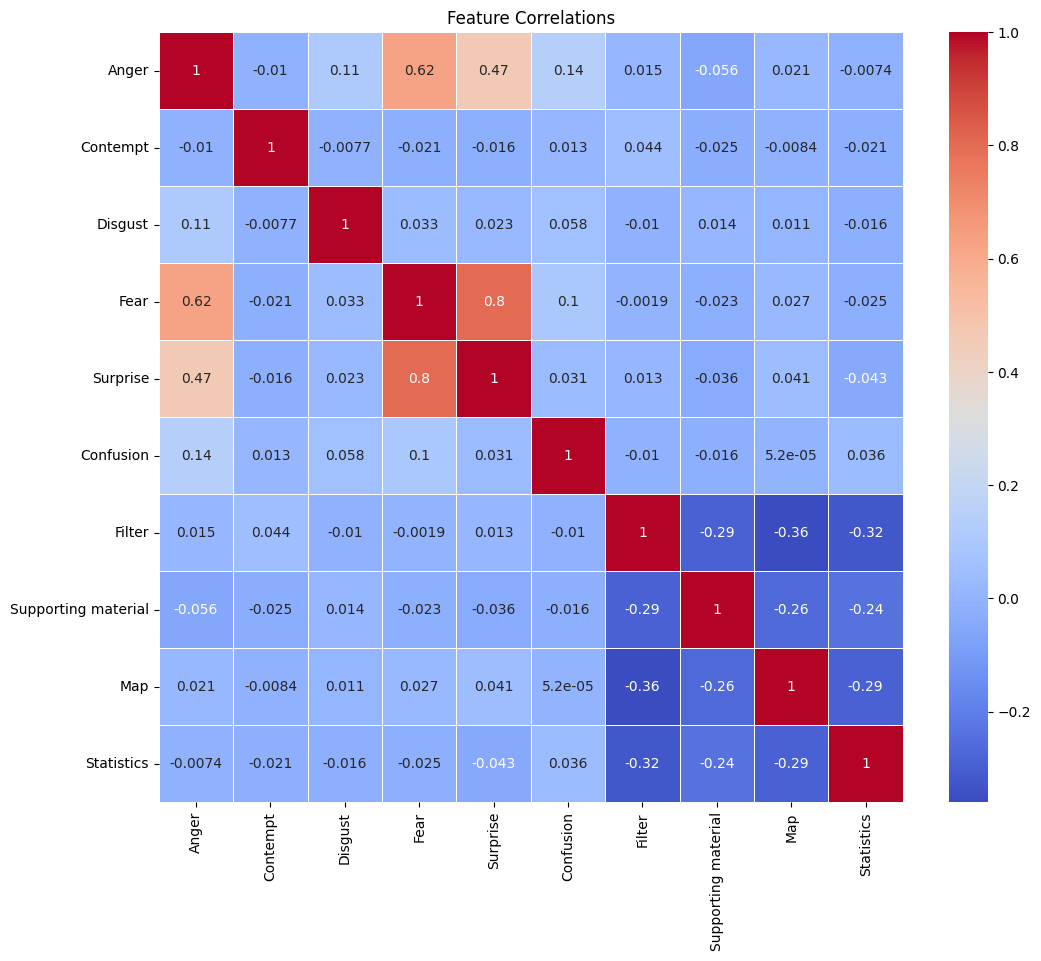

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_preprocessed.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


<h3>Features Coefficients </h3>

In [21]:
coefficients = log_reg.coef_

feature_names = X_preprocessed.columns
coef_df = pd.DataFrame(coefficients, columns=feature_names)

average_coef = coef_df.mean(axis=0)

sorted_features = average_coef.abs().sort_values(ascending=False)

print("Feature importances (by absolute coefficients):\n")
print(sorted_features)


Feature importances (by absolute coefficients):

Supporting material    6.220421e-14
Statistics             4.409171e-14
Map                    1.852486e-14
Surprise               6.716849e-15
Anger                  6.649443e-15
Filter                 3.679596e-15
Fear                   3.487290e-15
Confusion              2.260097e-15
Contempt               1.617754e-15
Disgust                1.499792e-15
dtype: float64
